In [1]:
# Aim- TO feed the stock data from 1st Jan'21 to 1st Jan'22 and predict the expected CAPM based model's return on 11th May'22.

In [2]:
from scipy import stats
import pandas as pd
import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Took 5 year data into considation.

start = datetime.datetime(2021,1,1)
end = datetime.datetime(2022,1,1)

In [4]:
# Used Yahoo Finance and took Nifty 50 as index for market return, and Yahoo Finance as the data source provider.

df_nse = web.DataReader('^NSEI','yahoo',start,end)
df_nse.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,14049.849609,13991.349609,13996.099609,14018.500000,358100,14018.500000
2021-01-04,14147.950195,13953.750000,14104.349609,14132.900391,495000,14132.900391
2021-01-05,14215.599609,14048.150391,14075.150391,14199.500000,492500,14199.500000
2021-01-06,14244.150391,14039.900391,14240.950195,14146.250000,632300,14146.250000
2021-01-07,14256.250000,14123.099609,14253.750000,14137.349609,559200,14137.349609


In [5]:
# Took Bajaj Finance Ltd. as the stock in consideration.

df_stock = web.DataReader('BAJFINANCE.NS','yahoo',start,end)
df_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,5338.000000,5250.000000,5310.200195,5280.149902,1447187.0,5252.506836
2021-01-04,5324.000000,5196.200195,5324.000000,5216.200195,2333659.0,5188.891602
2021-01-05,5224.200195,5062.500000,5218.000000,5119.000000,3953400.0,5092.200195
2021-01-06,5168.350098,4990.299805,5130.000000,5030.299805,3607923.0,5003.964355
2021-01-07,5131.549805,5021.299805,5065.000000,5081.000000,3035750.0,5054.399902


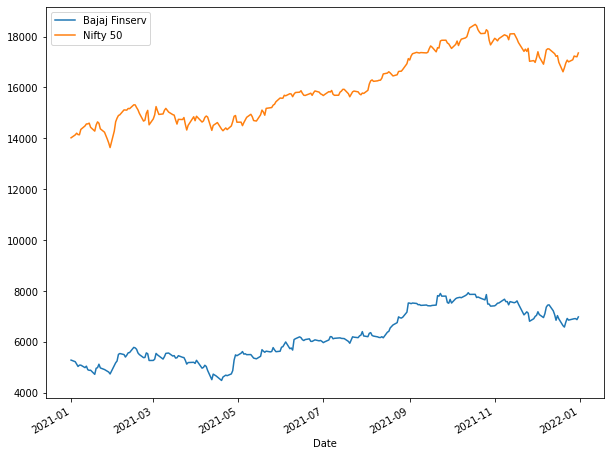

In [6]:
# Absolute plot of Stocks price.

df_stock['Close'].plot(label = 'Bajaj Finserv', figsize=(10,8))
df_nse['Close'].plot(label = 'Nifty 50')
plt.legend()

In [7]:
# Making a cummulative table column.

df_stock['Cumu'] = df_stock['Close']/df_stock['Close'].iloc[0] #cumulative return, rrelative to Day0 closing.
df_nse['Cumu'] = df_nse['Close']/df_nse['Close'].iloc[0]

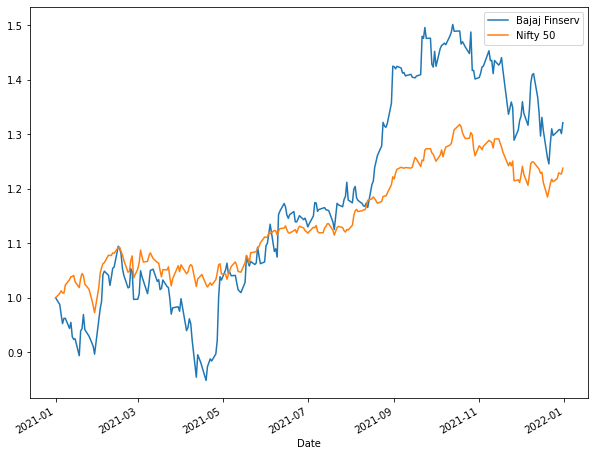

In [8]:
# Cummulative plot graph for vizulaizing relative gain/loss of a stocks.

df_stock['Cumu'].plot(label = 'Bajaj Finserv', figsize=(10,8))
df_nse['Cumu'].plot(label = 'Nifty 50')
plt.legend()

In [9]:
# Daily changes in cummulative price of stocks.

df_stock['daily_ret'] = df_stock['Close'].pct_change(1)
df_nse['daily_ret'] = df_nse['Close'].pct_change(1)

In [10]:
df_nse

,High,Low,Open,Close,Volume,Adj Close,Cumu,daily_ret
Date,,,,,,,,
2021-01-01,14049.849609,13991.349609,13996.099609,14018.500000,358100,14018.500000,1.000000,NaN
2021-01-04,14147.950195,13953.750000,14104.349609,14132.900391,495000,14132.900391,1.008161,0.008161
2021-01-05,14215.599609,14048.150391,14075.150391,14199.500000,492500,14199.500000,1.012912,0.004712
2021-01-06,14244.150391,14039.900391,14240.950195,14146.250000,632300,14146.250000,1.009113,-0.003750
2021-01-07,14256.250000,14123.099609,14253.750000,14137.349609,559200,14137.349609,1.008478,-0.000629
...,...,...,...,...,...,...,...,...
2021-12-27,17112.050781,16833.199219,16937.750000,17086.250000,144800,17086.250000,1.218836,0.004852
2021-12-28,17250.250000,17161.150391,17177.599609,17233.250000,176000,17233.250000,1.229322,0.008603
2021-12-29,17285.949219,17176.650391,17220.099609,17213.599609,161700,17213.599609,1.227920,-0.001140


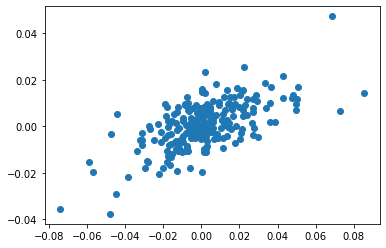

In [11]:
# Scatter plots of daily returns of stocks.

plt.scatter(df_stock['daily_ret'],df_nse['daily_ret'])

In [12]:
# Plotting Linear regression of the above graph

LR = stats.linregress(df_stock['daily_ret'].iloc[1:],df_nse['daily_ret'].iloc[1:])

In [13]:
# Values obtaibed

LR

LinregressResult(slope=0.30289607429573445, intercept=0.0005058653732726757, rvalue=0.6396327955262325, pvalue=8.058089332556058e-30, stderr=0.023255506783162162, intercept_stderr=0.0004852331343791052)

In [14]:
# Initializing the values to variables.

beta,alpha,r_val,p_val,std_err = LR

In [15]:
# Slope of graph

beta

0.30289607429573445

In [16]:
# Intercept of linesr regression

alpha #not for use as of now.in CAPM model, FF me use ayega.

0.0005058653732726757

In [17]:
# For predicting return on an asset on May 11th, we made a dataframe for that time.

date_1 = datetime.datetime(2022,5,11)
df_stock_1 = web.DataReader('BAJFINANCE.NS','yahoo',date_1, date_1)
df_stock_1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-11,5996.600098,5737,5957,5807,1861339,5785.932617


In [18]:
# Original return obtained.

original_return = df_stock_1.iloc[0].at["Close"]/df_stock.iloc[0].at["Close"]
original_return

1.0997793826691156

In [19]:
#Using Formula, taking risk free return as 1.

capm_return = 1 + beta * (df_stock.iloc[-1].at["Cumu"] - 1)
capm_return

1.097357092586165